#📌 Extracão

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)

In [24]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [45]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


#🔧 Transformação

Identificando valores nulos, inconsistentes, dados fora do padrão esperado e colunas duplicadas.

In [25]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [26]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [27]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [28]:
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())


customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn:
['No' 'Yes' '']

customer.gender:
['Female' 'Male']

customer.SeniorCitizen:
[0 1]

customer.Partner:
['Yes' 'No']

customer.Dependents:
['Yes' 'No']

customer.tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

phone.PhoneService:
['Yes' 'No']

phone.MultipleLines:
['No' 'Yes' 'No phone service']

internet.InternetService:
['DSL' 'Fiber optic' 'No']

internet.OnlineSecurity:
['No' 'Yes' 'No internet service']

internet.OnlineBackup:
['Yes' 'No' 'No internet service']

internet.DeviceProtection:
['No' 'Yes' 'No internet service']

internet.TechSupport:
['Yes' 'No' 'No internet service']

internet.StreamingTV:
['Yes' 'No' 'No internet service']

internet.StreamingMovies:
['No' 'Yes' 'No internet service']

In [29]:
df.duplicated().sum()

np.int64(0)

Correções dos erros

In [30]:
# Corrigindo a coluna Churn
df[df['Churn'] == '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [33]:
# Esse codigo avalia se há dados incorretos
df['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [32]:
#Esse codigo apaga os dados que estão faltando
df = df[df['Churn'] != '']

In [34]:
df['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [35]:
# Corrigindo a coluna account.Charges.Total (Convertendo de object para )
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

#📊 Carga e análise

In [48]:
df_fidelidade = df[['customer.tenure', 'account.Contract', 'Churn']]

df_perfil = df[['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'Churn']]

df_financeiro = df[['account.Charges.Monthly', 'account.Charges.Total', 'account.PaymentMethod', 'Churn']]

df_servicos = df[['internet.InternetService',
                  'internet.OnlineSecurity',
                  'internet.OnlineBackup',
                  'internet.DeviceProtection',
                  'internet.TechSupport',
                  'internet.StreamingTV',
                  'internet.StreamingMovies',
                  'phone.PhoneService',
                  'phone.MultipleLines',
                  'Churn']]

In [51]:
#Permanencia de clientes
df_fidelidade.groupby('Churn')['customer.tenure'].mean()

,customer.tenure
Churn,
No,37.569965
Yes,17.979133


In [52]:
df_fidelidade.groupby(['account.Contract', 'Churn']).size().unstack()

Churn,No,Yes
account.Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [53]:
contrato_churn = df_fidelidade.groupby(['account.Contract', 'Churn']).size().unstack()
percentual_churn = contrato_churn.div(contrato_churn.sum(axis=1), axis=0) * 100
print(percentual_churn.round(2))

Churn                No    Yes
account.Contract              
Month-to-month    57.29  42.71
One year          88.73  11.27
Two year          97.17   2.83


In [54]:
for coluna in ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']:
    print(f"\nChurn por: {coluna}")
    print(df_perfil.groupby([coluna, 'Churn']).size().unstack())


Churn por: customer.SeniorCitizen
Churn                     No   Yes
customer.SeniorCitizen            
0                       4508  1393
1                        666   476

Churn por: customer.Partner
Churn               No   Yes
customer.Partner            
No                2441  1200
Yes               2733   669

Churn por: customer.Dependents
Churn                  No   Yes
customer.Dependents            
No                   3390  1543
Yes                  1784   326


In [55]:
print("\nMédia de gastos mensais por churn:")
print(df_financeiro.groupby('Churn')['account.Charges.Monthly'].mean())

print("\nMédia de gastos totais por churn:")
print(df_financeiro.groupby('Churn')['account.Charges.Total'].mean())


Média de gastos mensais por churn:
Churn
No     61.265124
Yes    74.441332
Name: account.Charges.Monthly, dtype: float64

Média de gastos totais por churn:
Churn
No     2555.344141
Yes    1531.796094
Name: account.Charges.Total, dtype: float64


In [56]:
print("\nChurn por método de pagamento:")
print(df_financeiro.groupby(['account.PaymentMethod', 'Churn']).size().unstack())


Churn por método de pagamento:
Churn                        No   Yes
account.PaymentMethod                
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


In [59]:
for coluna in df_servicos.columns:
    if coluna != 'Churn':
        print(f"\nChurn por: {coluna}")
        print(df_servicos.groupby([coluna, 'Churn']).size().unstack())


Churn por: internet.InternetService
Churn                       No   Yes
internet.InternetService            
DSL                       1962   459
Fiber optic               1799  1297
No                        1413   113

Churn por: internet.OnlineSecurity
Churn                      No   Yes
internet.OnlineSecurity            
No                       2037  1461
No internet service      1413   113
Yes                      1724   295

Churn por: internet.OnlineBackup
Churn                    No   Yes
internet.OnlineBackup            
No                     1855  1233
No internet service    1413   113
Yes                    1906   523

Churn por: internet.DeviceProtection
Churn                        No   Yes
internet.DeviceProtection            
No                         1884  1211
No internet service        1413   113
Yes                        1877   545

Churn por: internet.TechSupport
Churn                   No   Yes
internet.TechSupport            
No                    2027  144

#📊 Graficos

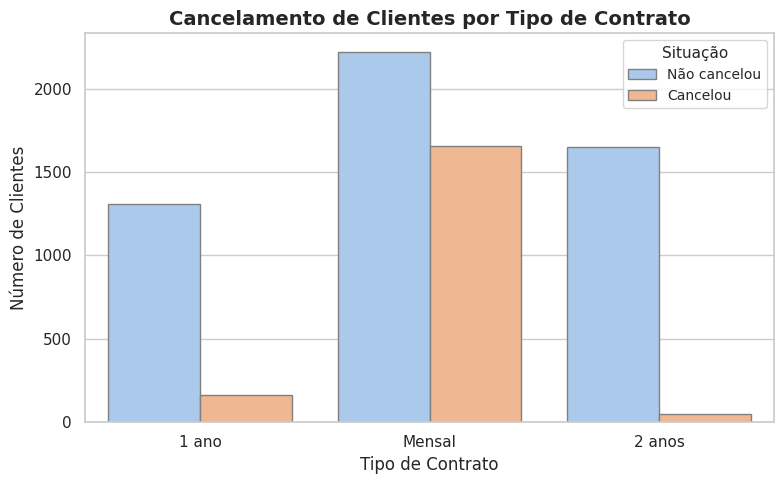

In [71]:
sns.set(style="whitegrid")
mapa_contratos = {
    'Month-to-month': 'Mensal',
    'One year': '1 ano',
    'Two year': '2 anos'
}
df_fidelidade['Contrato (traduzido)'] = df_fidelidade['account.Contract'].map(mapa_contratos)
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_fidelidade,
    x='Contrato (traduzido)',
    hue='Churn',
    palette='pastel',
    edgecolor='gray'
)
ax.set_title('Cancelamento de Clientes por Tipo de Contrato', fontsize=14, weight='bold')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não cancelou', 'Cancelou'], title='Situação', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

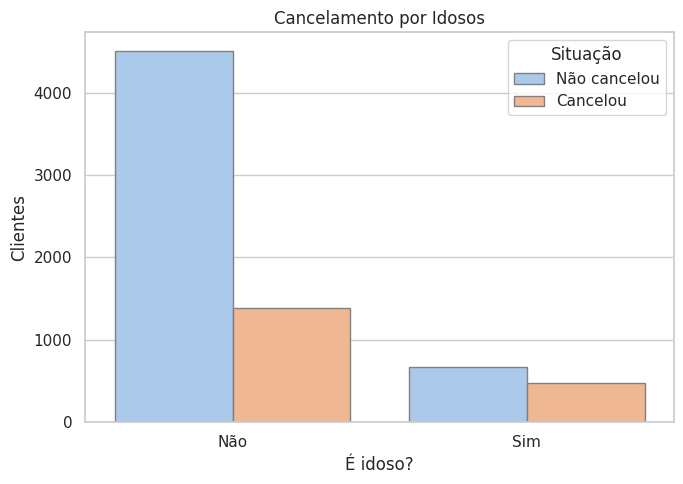

In [73]:
df_perfil['Idoso'] = df_perfil['customer.SeniorCitizen'].map({1: 'Sim', 0: 'Não'})
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_perfil, x='Idoso', hue='Churn', palette='pastel', edgecolor='gray')
ax.set_title('Cancelamento por Idosos')
ax.set_xlabel('É idoso?')
ax.set_ylabel('Clientes')
ax.legend(title='Situação', labels=['Não cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()

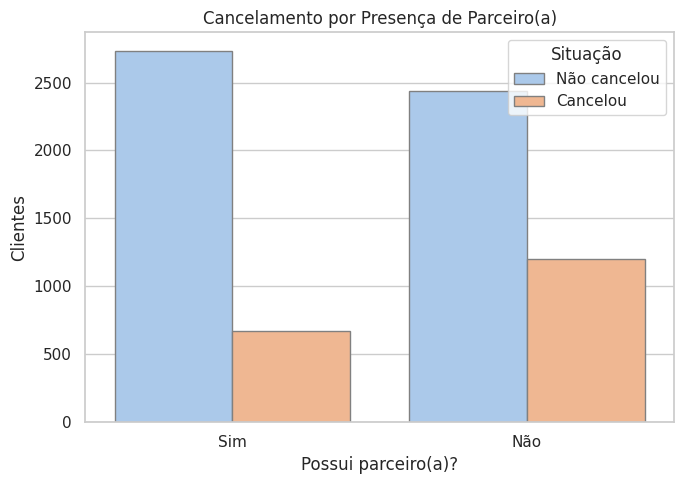

In [74]:
df_perfil['Possui Parceiro(a)'] = df_perfil['customer.Partner'].map({'Yes': 'Sim', 'No': 'Não'})
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_perfil, x='Possui Parceiro(a)', hue='Churn', palette='pastel', edgecolor='gray')
ax.set_title('Cancelamento por Presença de Parceiro(a)')
ax.set_xlabel('Possui parceiro(a)?')
ax.set_ylabel('Clientes')
ax.legend(title='Situação', labels=['Não cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()

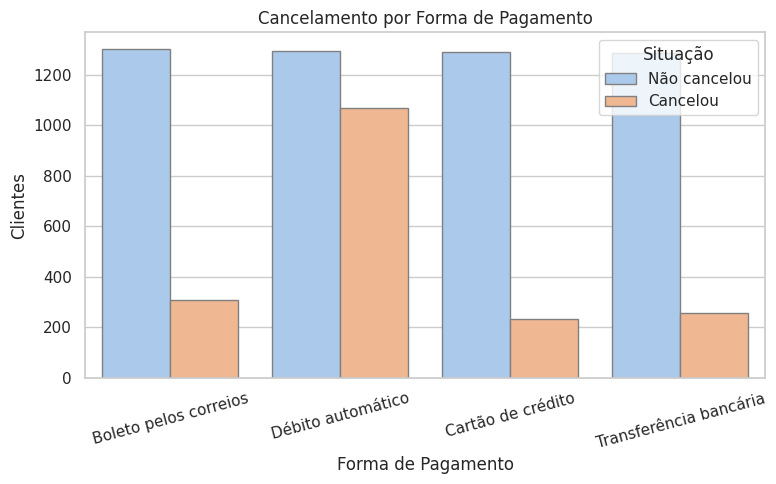

In [75]:
df_financeiro['Forma de Pagamento'] = df_financeiro['account.PaymentMethod'].map({
    'Electronic check': 'Débito automático',
    'Mailed check': 'Boleto pelos correios',
    'Bank transfer (automatic)': 'Transferência bancária',
    'Credit card (automatic)': 'Cartão de crédito'
})
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_financeiro, x='Forma de Pagamento', hue='Churn', palette='pastel', edgecolor='gray')
ax.set_title('Cancelamento por Forma de Pagamento')
ax.set_xlabel('Forma de Pagamento')
ax.set_ylabel('Clientes')
ax.tick_params(axis='x', rotation=15)
ax.legend(title='Situação', labels=['Não cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()

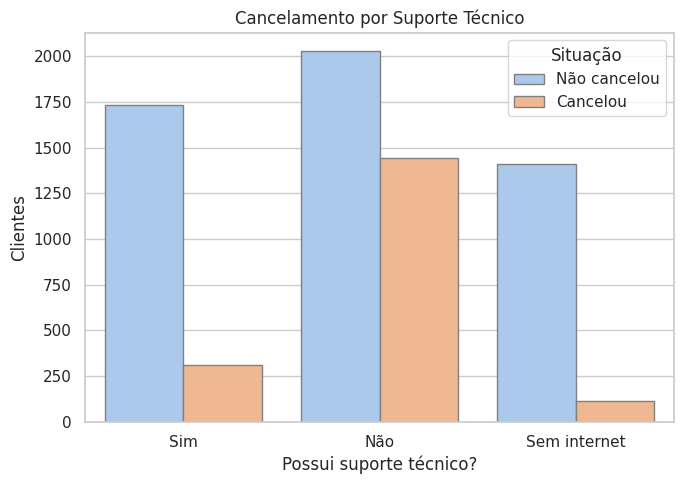

In [76]:
df_servicos['Suporte Técnico'] = df_servicos['internet.TechSupport'].map({
    'Yes': 'Sim',
    'No': 'Não',
    'No internet service': 'Sem internet'
})
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_servicos, x='Suporte Técnico', hue='Churn', palette='pastel', edgecolor='gray')
ax.set_title('Cancelamento por Suporte Técnico')
ax.set_xlabel('Possui suporte técnico?')
ax.set_ylabel('Clientes')
ax.legend(title='Situação', labels=['Não cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()

#📊 Relatório: Análise de Evasão de Clientes


Objetivo

O projeto tem como objetivo analisar os dados de clientes de uma empresa de telecomunicações a fim de identificar padrões associados à evasão (churn). Com base nessa análise, buscamos entender os principais fatores que influenciam o cancelamento dos serviços e propor insights para retenção de clientes.



# 🧹 Etapas realizadas

Extração dos dados via GitHub no formato .json;

Importação no ambiente Google Colab;

Normalização dos dados aninhados com pd.json_normalize();

Tratamento de dados:

Remoção de 224 registros com Churn em branco;

Conversão de colunas numéricas;

Verificação e correção de inconsistências (ex: serviços contratados sem internet);

Nenhuma duplicata encontrada.



# 🔍 Análises realizadas

📌 1. Fidelidade (df_fidelidade)
Clientes com contratos mensais apresentam maior taxa de evasão em comparação aos contratos anuais e bienais.

A média de tempo de permanência dos clientes que cancelaram é consideravelmente menor do que a dos que permaneceram.

📊 Gráficos:

Churn por tipo de contrato

Tempo de permanência por churn

📌 2. Perfil do Cliente (df_perfil)
Idosos têm uma taxa ligeiramente maior de cancelamento, embora o efeito não seja muito expressivo.

Clientes sem parceiro(a) ou sem dependentes também apresentaram taxas um pouco maiores de evasão.

📊 Gráficos:

Churn por idade avançada

Churn por presença de parceiro(a)

📌 3. Financeiro (df_financeiro)
Clientes que pagam via débito automático (Electronic check) apresentaram as maiores taxas de churn.

Clientes com valores mensais mais altos têm maior propensão ao cancelamento.

📊 Gráfico:

Churn por forma de pagamento

📌 4. Serviços Contratados (df_servicos)
Clientes que não possuem suporte técnico apresentaram taxas de evasão mais altas.

Serviços adicionais como segurança online e backup também têm correlação com menor evasão.

📊 Gráfico:

Churn por uso de suporte técnico

# ✅ Conclusão

Os dados analisados mostram que a evasão de clientes está fortemente associada a contratos curtos, métodos de pagamento automáticos e ausência de serviços adicionais de suporte. Com base nisso, recomenda-se:

Incentivar contratos mais longos, oferecendo benefícios;

Revisar a experiência dos clientes com débito automático;

Ampliar o suporte técnico e demonstrar valor de serviços extras.